In [1]:
import numpy as np
import matplotlib.pyplot as plt

# (a)

In [20]:
def lda(data, axis=1):
    global v
    Ns = [len(d) for d in data]
    # print("Ns:\n", Ns)
    N = np.sum(Ns)
    # print("N:\n", N)
    mus = [np.mean(d, axis=0) for d in data]
    # print("mus:\n", mus)
    m0 = np.mean(mus, axis=0)
    # print("m0:\n", m0)

    Sb = 0
    for i in range(len(data)):
        Sb += Ns[i]/N * (mus[i] - m0).T @ (mus[i] - m0)

    Sw = 0
    for i in range(len(data)):
        Sw += np.dot((data[i] - mus[i]).T, (data[i] - mus[i]))/Ns[i]

    try:
        S = np.linalg.inv(Sw).dot(Sb)
    except:
        S = np.linalg.pinv(Sw).dot(Sb)
        
    if len(data) == 2:
        w = mus[0] - mus[1]
        v = np.linalg.inv(Sw).dot(w)
        
    print("v:", v)

    return v

# (b)

v: [-3.83246075  2.1374852  -0.76736865]


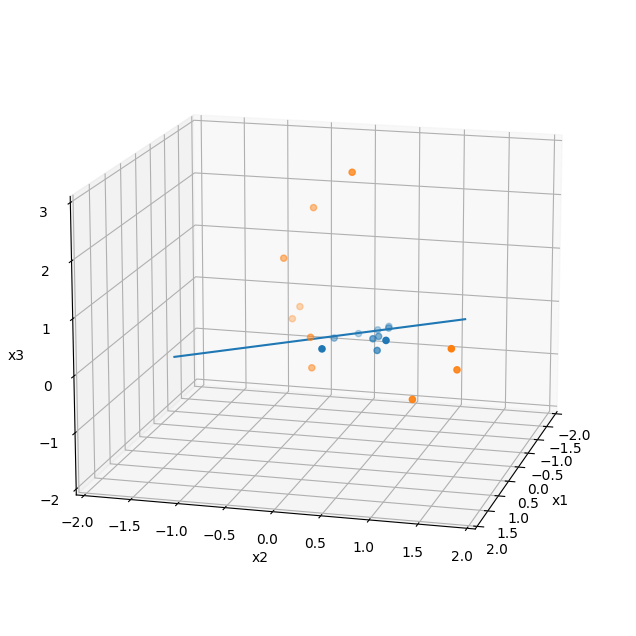

In [4]:
data_y = np.array([[[-0.4, 0.58, 0.089], [-0.31, 0.27, -0.04], [0.38, 0.055, -0.035], [-0.15, 0.53, 0.011], [-0.35, 0.47, 0.034],
                  [0.17, 0.69, 0.1], [-0.011, 0.55, -0.18], [-0.27, 0.61, 0.12], [-0.065, 0.49, 0.0012], [-0.12, 0.054, -0.063]],
                 [[0.83, 1.6, -0.014], [1.1, 1.6, 0.48], [-0.44, -0.41, 0.32], [0.047, -0.45, 1.4], [0.28, 0.35, 3.1],
                  [-0.39, -0.48, 0.11], [0.34, -0.079, 0.14], [-0.3, -0.22, 2.2], [1.1, 1.2, -0.46], [0.18, -0.11, -0.49]]
                 ])

v = lda(data_y)

y1 = data_y[0]
y2 = data_y[1]

t = np.linspace(-0.5, 0.5)
x = v[0]*t
y = v[1]*t
z = v[2]*t
plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')
ax.scatter3D(y1[:, 0], y1[:, 1], y1[:, 2])
ax.scatter3D(y2[:, 0], y2[:, 1], y2[:, 2])
ax.plot3D(x, y, z)
ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 3)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.view_init(15, 15)
plt.show()

# (c)

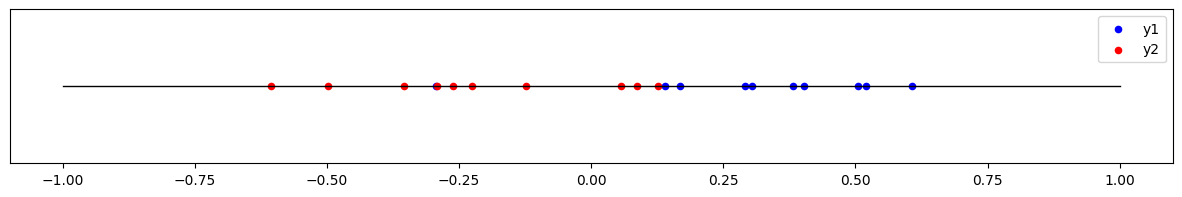

In [5]:
projected_y1 = y1 @ v/np.linalg.norm(v)
projected_y2 = y2 @ v/np.linalg.norm(v)

plt.figure(figsize=(15, 2))
plt.plot([-1, 1], [0, 0], linewidth=1, color='k')
plt.scatter(projected_y1, np.zeros((1, 10)), s=20, c='b', label='y1')
plt.scatter(projected_y2, np.zeros((1, 10)), s=20, c='r', label='y2')
plt.yticks([])
plt.legend()
plt.show()

# (d) (e)

decision_boundary: 0.04609218436873741
error: 0.2


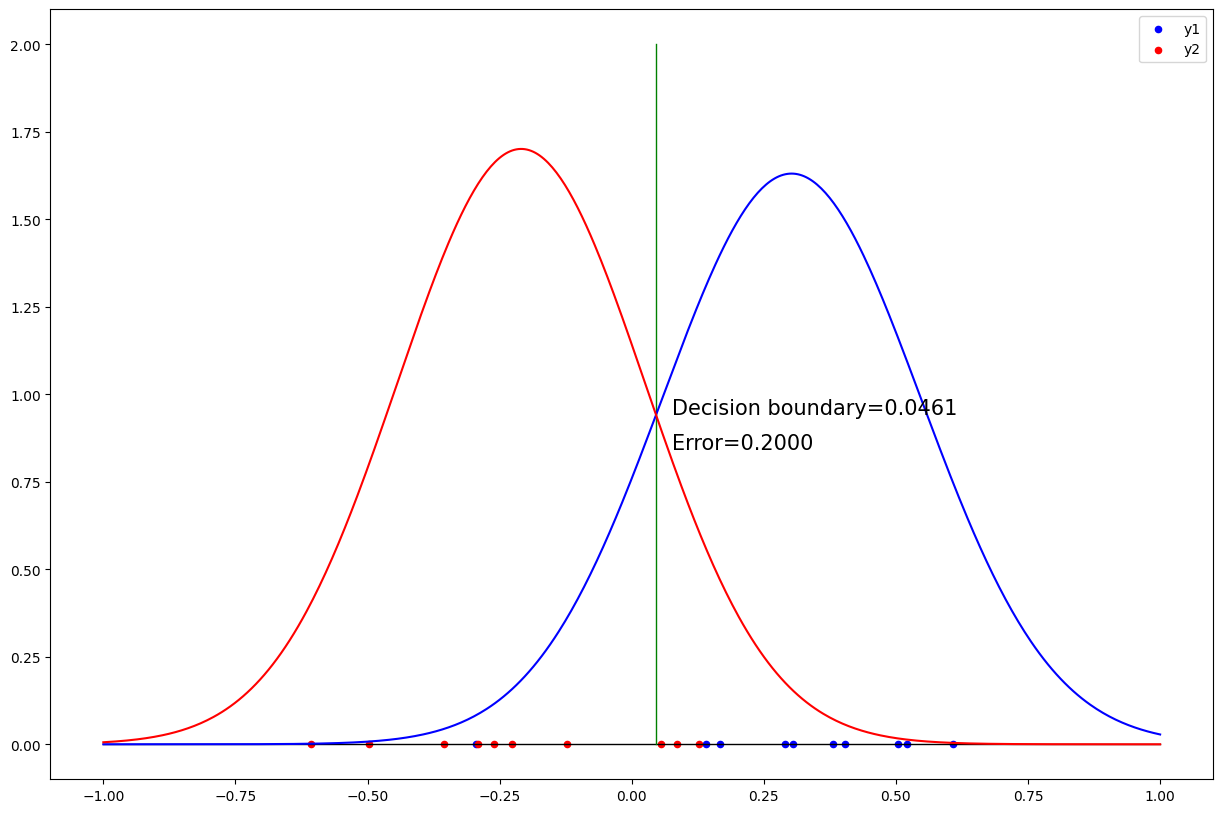

In [6]:
from scipy.stats import norm

t = np.linspace(-1, 1, 500)
pdf1 = norm.pdf(t, np.mean(projected_y1), np.std(projected_y1))
pdf2 = norm.pdf(t, np.mean(projected_y2), np.std(projected_y2))

"""
找到兩筆資料的 pdf 交點，即為 decision boundary
"""
boundary_indexs = [np.abs(pdf1[i]-pdf2[i]) for i in range(len(t))]
min_index = np.argmin(boundary_indexs)
decision_boundary = t[min_index]
print("decision_boundary:", decision_boundary)

"""
如果 porject_y1 < decision_boundary 或 project_y2 > decision_boundary 則分類錯誤，因此 error+1
"""
error = 0
for i in range(len(projected_y1)):
    if projected_y1[i] < decision_boundary:
        error += 1
for i in range(len(projected_y2)):
    if projected_y2[i] > decision_boundary:
        error += 1

error /= (len(projected_y1) + len(projected_y2))
print("error:", error)

plt.figure(figsize=(15, 10))

plt.plot([-1, 1], [0, 0], linewidth=1, color='k')
plt.scatter(projected_y1, np.zeros((1, 10)), s=20, c='b', label='y1')
plt.scatter(projected_y2, np.zeros((1, 10)), s=20, c='r', label='y2')


plt.plot([decision_boundary, decision_boundary], [0, 2], linewidth=1, color='g')
plt.plot(t, pdf1, c='b')
plt.plot(t, pdf2, c='r')

plt.text(decision_boundary+0.03, pdf1[min_index], f"Decision boundary={decision_boundary:.4f}", fontsize=15, color='black')
plt.text(decision_boundary+0.03, pdf1[min_index]-0.1, f"Error={error:.4f}", fontsize=15, color='black')
plt.legend()
plt.show()

# Problem 2

In [7]:
def PCA(x, axis=2):
    E, sigma, FT = np.linalg.svd(x)
    s = np.eye(E.shape[0], FT.shape[0])
    s[:sigma.shape[0], :sigma.shape[0]] = np.diag(sigma)
    eigenvalues = s.copy()
    eigenvalues[axis::] = 0 # 只取前10個 eigenvalue, 其他的都設為0
    pca = E.dot(eigenvalues).dot(FT)
    return pca

In [8]:
with open("06HW1_iris.csv", 'r') as f:
    data = f.readlines()

data = [line.strip().split(',') for line in data if line.strip()]

# (a)

In [9]:
X = [list(map(float,line[:-1]))for line in data]
X_pca = PCA(X)

X = np.array(X)
X_pca = np.array(X_pca)

C = np.cov(np.array(X).T)
D, V = np.linalg.eig(C)
D_total = np.cumsum(D, axis=0)/np.sum(D, axis=0)*100

x = np.linspace(1, len(D), len(D))

# (1)

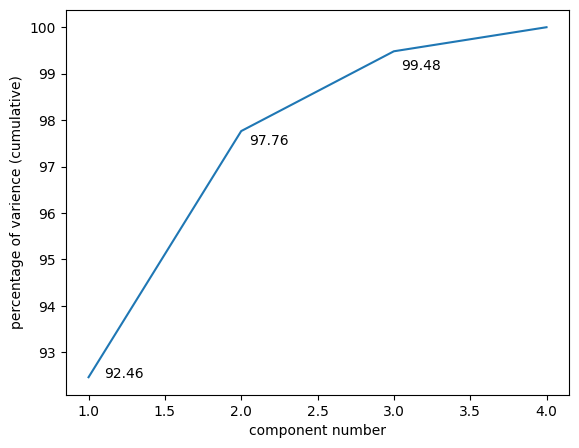

In [10]:
plt.figure(figsize=(6.5, 5))
plt.xlabel("component number")
plt.ylabel("percentage of varience (cumulative)")
plt.plot(x, D_total)

plt.text(1.1, D_total[0], f'{D_total[0]:.2f}')
plt.text(2.05, D_total[1]-0.3, f'{D_total[1]:.2f}')
plt.text(3.05, D_total[2]-0.4, f'{D_total[2]:.2f}')
plt.show()

# (2)

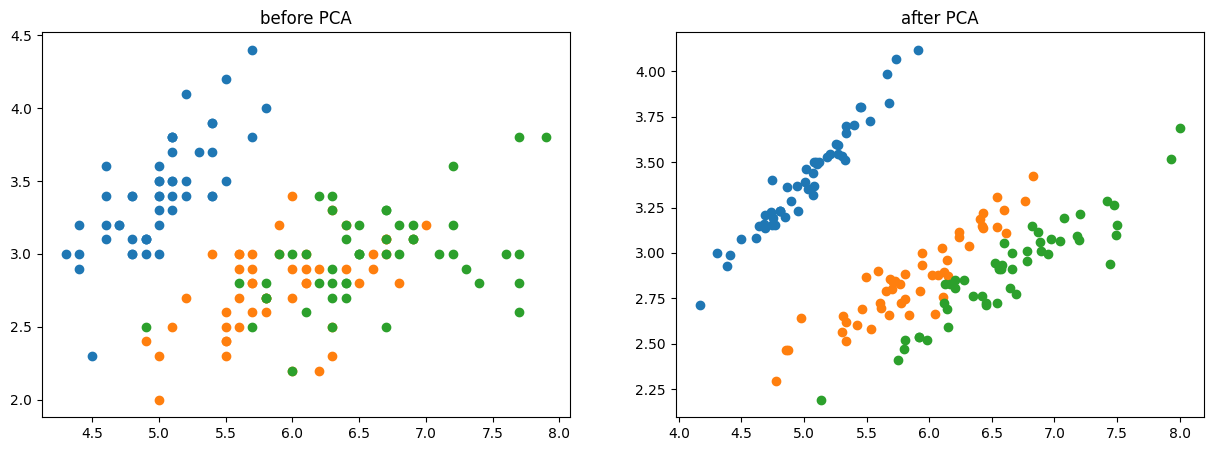

In [11]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.scatter(X[0:50, 0], X[0:50, 1])
plt.scatter(X[50:100, 0], X[50:100, 1])
plt.scatter(X[100:150, 0], X[100:150, 1])
plt.title('before PCA')
plt.subplot(122)
plt.scatter(X_pca[0:50, 0], X_pca[0:50, 1])
plt.scatter(X_pca[50:100, 0], X_pca[50:100, 1])
plt.scatter(X_pca[100:150, 0], X_pca[100:150, 1])
plt.title('after PCA')
plt.show()

# (b)

In [14]:
def scatter_plot(array, error, decision_boundary, num=30, position=1, title=""):
    plt.subplot(2, 2, position)
    plt.title(title)

    plt.scatter(array[:num], np.zeros((1, num)), s=20, label='y1')
    plt.scatter(array[num:num*2], np.zeros((1, num)), s=20, label='y2')
    plt.scatter(array[num*2:num*3], np.zeros((1, num)), s=20, label='y3')
    plt.plot([decision_boundary[0], decision_boundary[0]], [0, 0.1], linewidth=1)
    plt.plot([decision_boundary[1], decision_boundary[1]], [0, 0.1], linewidth=1)
    plt.text((decision_boundary[0]+decision_boundary[1])/2, 0.05, f'Error = {error:.3f}', fontsize=15)
    plt.axhline(0, c='black', linestyle='--', zorder=0)
    plt.yticks([])
    plt.legend()

def decision_boundary(array, num, v):
    m1 = np.mean(array[:num],axis=0)
    m2 = np.mean(array[num:num*2], axis=0)
    m3 = np.mean(array[num*2:num*3], axis=0)
    decision_boundary_1 = ((m1+m2)/2).dot(v)/np.linalg.norm(v)
    decision_boundary_2 = ((m2+m3)/2).dot(v)/np.linalg.norm(v)

    return decision_boundary_1, decision_boundary_2

def calcualte_error(array, boundary_1, boundary_2, num):
    error = 0
    for i in range(num):
        if array[i] > boundary_1:
            error += 1
        if array[i+num] < boundary_1 or array[i+num] > boundary_2:
            error += 1
        if array[i+num*2] < boundary_2:
            error += 1
    error /= num*3
    return error

## (1) (2)

In [23]:
def lda(data, axis=1):
    Ns = [len(d) for d in data]
    N = np.sum(Ns)
    mus = [np.mean(d, axis=0) for d in data]
    m0 = np.mean(mus, axis=0)

    Sb = sum(Ns[i]/N * np.outer(mus[i] - m0, mus[i] - m0) for i in range(len(data)))

    Sw = sum(np.dot((data[i] - mus[i]).T, (data[i] - mus[i])) / Ns[i] for i in range(len(data)))

    try:
        S = np.linalg.inv(Sw).dot(Sb)
    except:
        S = np.linalg.pinv(Sw).dot(Sb)

    eigvals, eigvecs = np.linalg.eig(S)
    idx = np.argsort(-eigvals)
    eigvecs = eigvecs[:, idx]
    eigvecs = eigvecs[:, :len(data)-1]  # 取前 len(data)-1 个特征向量

    return eigvecs


decision_boundary: (-0.27739436779754645+0j) (1.2591502756525288+0j)
decision_boundary: -3.294376653399973 -3.3896541055097154


c:\Users\yylunxie\.virtualenvs\ML-gNUwshO0\lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
c:\Users\yylunxie\.virtualenvs\ML-gNUwshO0\lib\site-packages\matplotlib\cbook\__init__.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
c:\Users\yylunxie\.virtualenvs\ML-gNUwshO0\lib\site-packages\matplotlib\text.py:897: ComplexWarning: Casting complex values to real discards the imaginary part
  x = float(self.convert_xunits(self._x))
c:\Users\yylunxie\.virtualenvs\ML-gNUwshO0\lib\site-packages\matplotlib\text.py:757: ComplexWarning: Casting complex values to real discards the imaginary part
  posx = float(self.convert_xunits(self._x))


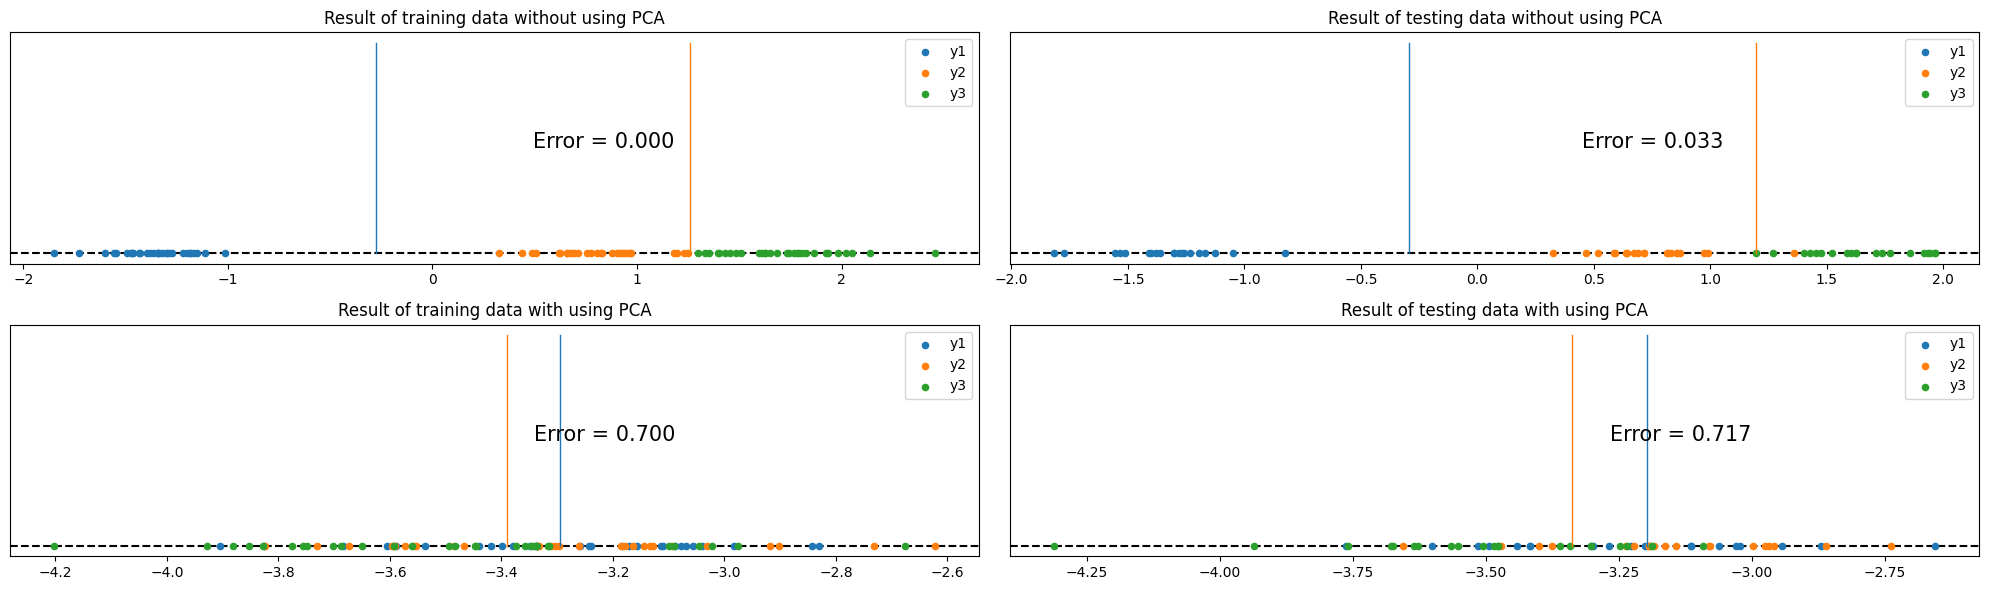

In [24]:
"""
不使用 PCA
"""
X_1 = X[0:50, :]
X_2 = X[50:100, :]
X_3 = X[100:150, :]
X_train = [X_1[0:30, :], X_2[0:30, :], X_3[0:30, :]]
X_test = [X_1[30:50, :], X_2[30:50, :], X_3[30:50, :]]
v1, v2 = lda(X_train, axis=2).T

X_train = np.concatenate(X_train, axis=0)
X_test = np.concatenate(X_test, axis=0)
projected_train = X_train @ v1/np.linalg.norm(v1)
projected_test = X_test @ v1/np.linalg.norm(v1)

plt.figure(figsize=(20, 6))

decision_boundary_1, decision_boundary_2 = decision_boundary(X_train, 30, v1)
print("decision_boundary:", decision_boundary_1, decision_boundary_2)  
error1 = calcualte_error(projected_train, decision_boundary_1, decision_boundary_2, 30)
scatter_plot(projected_train, error=error1, decision_boundary=(decision_boundary_1, decision_boundary_2), title="Result of training data without using PCA")

decision_boundary_1, decision_boundary_2 = decision_boundary(X_test, 20, v1)
error2 = calcualte_error(projected_test, decision_boundary_1, decision_boundary_2, 20)
scatter_plot(projected_test, error=error2, decision_boundary=(decision_boundary_1, decision_boundary_2), title="Result of testing data without using PCA", num=20, position=2)

"""
PCA
"""

X_1 = X_pca[0:50, :]
X_2 = X_pca[50:100, :]
X_3 = X_pca[100:150, :]

X_train = [X_1[0:30, :], X_2[0:30, :], X_3[0:30, :]]
X_test = [X_1[30:50, :], X_2[30:50, :], X_3[30:50, :]]
v1, v2 = lda(X_train, axis=2).T

X_train = np.concatenate(X_train, axis=0)
X_test = np.concatenate(X_test, axis=0)
projected_train = X_train @ v2/np.linalg.norm(v2)
projected_test = X_test @ v2/np.linalg.norm(v2)

decision_boundary_1, decision_boundary_2 = decision_boundary(X_train, 30, v2)
print("decision_boundary:", decision_boundary_1, decision_boundary_2)  
error1 = calcualte_error(projected_train, decision_boundary_1, decision_boundary_2, 30)
scatter_plot(projected_train, error=error1, decision_boundary=(decision_boundary_1, decision_boundary_2), title="Result of training data with using PCA", position=3)

decision_boundary_1, decision_boundary_2 = decision_boundary(X_test, 20, v2)
error2 = calcualte_error(projected_test, decision_boundary_1, decision_boundary_2, 20)
scatter_plot(projected_test, error=error2, decision_boundary=(decision_boundary_1, decision_boundary_2), title="Result of testing data with using PCA", num=20, position=4)

plt.tight_layout()
plt.show()

## (3)

使用PCA由助於提升對於資料的分類表現